In [1]:
import pandas as pd 
import os
import json
import numpy as np
import pickle

# Data

In [2]:
data = pd.DataFrame()

In [ ]:
main_path = r'D:\Data Analytics for Business\SEM 4\DAB402 Capstone Project\Dataset'

# the directory where we have the 2 json folders
sub_folder = ['GridSybil_0709','GridSybil_1416']
for folders in  sub_folder:
    for sub_folders in os.listdir(os.path.join(main_path,folders)):
        for files in os.listdir(os.path.join(main_path,folders,sub_folders)):
            if files[5:9] =='JSON':
                
                dum = pd.read_json(os.path.join(main_path,folders,sub_folders,files),lines=True)    #  reading the json files into dum as dataframe
                dum = dum[dum['type']==3]              # filtering to only keep data of type 3
                dum['filename'] = files[:-5]
                data = pd.concat([data,dum],axis=0)   #concatinate the read json with the dataframe on rows. so that data points are added as observations

In [ ]:
data.to_csv('capstonedata.csv')


# Pre Processing

In [2]:
data = pd.read_csv('D:\Data Analytics for Business\SEM 4\DAB402 Capstone Project\capstonedata.csv')
data.drop('Unnamed: 0',inplace=True,axis=1)
data.head()

,type,rcvTime,pos,pos_noise,spd,spd_noise,acl,acl_noise,hed,hed_noise,sendTime,sender,senderPseudo,messageID,filename
0,3,28479.050886,"[224.04675344358614, 323.07785711503294, 0.0]","[5.030311666190533, 5.044219181412626, 0.0]","[-2.255933781958133, 15.005661511266194, 0.0]","[0.0017221998633050002, -0.011455636797272, 0.0]","[0.134746896936181, -0.896043383337591, 0.0]","[5.963439159000001e-06, 3.9858084671000006e-05...","[-0.106880347759151, 0.9942718900094091, 0.0]","[9.261860017623713, 1.648301502003733, 0.0]",28479.050886,9957.0,1099572.0,37781823.0,traceJSON-10005-10003-A0-28479-7
1,3,28479.055834,"[220.66071712262425, 421.00550748486205, 0.0]","[4.840641521077105, 4.920465638743104, 0.0]","[5.566612745e-06, 5.5814576640000004e-06, 0.0]","[3.464815567385116e-14, 3.464815567385116e-14,...","[5.667917161e-06, 5.667917161e-06, 0.0]","[3.438752571704685e-14, 3.438752571704685e-14,...","[0.07836586553438, -0.9969246667221381, 0.0]","[12.062982464698358, 12.062982464698358, 0.0]",28479.055834,9351.0,3093512.0,37782022.0,traceJSON-10005-10003-A0-28479-7
2,3,28479.074613,"[215.70773962352376, 437.31557043189093, 0.0]","[4.96792503657837, 5.047749154244368, 0.0]","[5.6888262890000005e-06, 5.880555168e-06, 0.0]","[3.438752571704685e-14, 3.438752571704685e-14,...","[5.667917161e-06, 5.667917161e-06, 0.0]","[3.438752571704685e-14, 3.438752571704685e-14,...","[0.078163071274224, -0.9969405871409691, 0.0]","[12.38100578240622, 12.38100578240622, 0.0]",28479.074613,9633.0,3096332.0,37782403.0,traceJSON-10005-10003-A0-28479-7
3,3,28479.098722,"[257.1859660014075, 144.14870966351154, 0.0]","[4.186330114627404, 4.101271417432637, 0.0]","[0.05979098143880301, -0.32514368141501504, 0.0]","[5.7786352302000004e-05, 9.876517551e-06, 0.0]","[0.058676236973247003, -0.32465516808549305, 0.0]","[5.3350507359e-05, 5.440672608e-06, 0.0]","[-0.147791321404097, 0.989018566720378, 0.0]","[14.651149822518718, 2.81648220459762, 0.0]",28479.098722,9711.0,2097112.0,37783223.0,traceJSON-10005-10003-A0-28479-7
4,3,28479.117215,"[226.47774513691945, 299.4554051151872, 0.0]","[5.237613483296878, 5.251520998518971, 0.0]","[0.131626105512298, -0.89152018438721, 0.0]","[5.963439159000001e-06, 3.9858084671000006e-05...","[0.134746896936181, -0.896043383337591, 0.0]","[5.963439159000001e-06, 3.9858084671000006e-05...","[-0.11683446436566101, 0.993151402323124, 0.0]","[9.261860017623713, 1.648301502003733, 0.0]",28479.117215,9993.0,6099932.0,37783550.0,traceJSON-10005-10003-A0-28479-7


In [3]:
# Removing all the columns that have noise in their column name
for c in data.columns:
    if 'noise' in c:
        data.drop(c,axis=1,inplace=True)

In [ ]:
for col in ['pos','spd','acl','hed']:
    # splitting the column into values as they were 3 dimentional vectors 
    # splitting the columns on ',' and putting them into col_x,col_y and col_z columns~

    data[str(col)+'_x'],data[str(col)+'_y'],data[str(col)+'_z'] = data[col].str.split(',',expand=True)[0],data[col].str.split(',',expand=True)[1],data[col].str.split(',',expand=True)[2]


    # as the data was considered as string '[' was added to the col_x and ']' was added to the z column so we need to remove it.
    data[str(col)+'_x'] = data[str(col)+'_x'].str.replace('[','')
    data[str(col)+'_z'] = data[str(col)+'_z'].str.replace(']','')

# dropping the columns that were vectors as we dont neeed them now

data.drop(['pos','spd','acl','hed'],axis=1,inplace=True)


In [ ]:
# As new columns are added filename column is now in between the columns, So we are moving it to the end .

cols = data.columns.to_list()
data_ver2 = data[cols[:6] +cols[7:]+cols[6:7]]

In [ ]:
data_ver2.to_csv("capstonedata_ver2.csv")

In [3]:
data_ver2 = pd.read_csv("D:\Data Analytics for Business\SEM 4\DAB402 Capstone Project\capstonedata_ver2.csv")
data_ver2.drop('Unnamed: 0',inplace=True,axis=1)

In [4]:
data_ver2.head()

,type,rcvTime,sendTime,sender,senderPseudo,messageID,pos_x,pos_y,pos_z,spd_x,spd_y,spd_z,acl_x,acl_y,acl_z,hed_x,hed_y,hed_z,filename
0,3,28479.050886,28479.050886,9957.0,1099572.0,37781823.0,224.046753,323.077857,0.0,-2.255934,15.005662,0.0,0.134747,-0.896043,0.0,-0.106880,0.994272,0.0,traceJSON-10005-10003-A0-28479-7
1,3,28479.055834,28479.055834,9351.0,3093512.0,37782022.0,220.660717,421.005507,0.0,0.000006,0.000006,0.0,0.000006,0.000006,0.0,0.078366,-0.996925,0.0,traceJSON-10005-10003-A0-28479-7
2,3,28479.074613,28479.074613,9633.0,3096332.0,37782403.0,215.707740,437.315570,0.0,0.000006,0.000006,0.0,0.000006,0.000006,0.0,0.078163,-0.996941,0.0,traceJSON-10005-10003-A0-28479-7
3,3,28479.098722,28479.098722,9711.0,2097112.0,37783223.0,257.185966,144.148710,0.0,0.059791,-0.325144,0.0,0.058676,-0.324655,0.0,-0.147791,0.989019,0.0,traceJSON-10005-10003-A0-28479-7
4,3,28479.117215,28479.117215,9993.0,6099932.0,37783550.0,226.477745,299.455405,0.0,0.131626,-0.891520,0.0,0.134747,-0.896043,0.0,-0.116834,0.993151,0.0,traceJSON-10005-10003-A0-28479-7


In [5]:
# Filename contains receiver id and information on how to label the data so we need to split the filename.

# WE are splitting the filename column on '-' and thereafter values at index 1 are our receiver id and values at index 3 is information we need to create our label data

data_ver2['receiver_id'],data_ver2['attacker'] =  data_ver2['filename'].str.split('-',expand=True)[1], data_ver2['filename'].str.split('-',expand=True)[3]
data_ver2['attacker'] = data_ver2['attacker'].str.replace('A','')    # as we dont need A we just neeed the integer part we are removing A from all the values.

In [ ]:
 # After splitting the filename and storing the receiver_id it is stored as an object so we need to change it to integer format

data_ver2['receiver_id'] = data_ver2['receiver_id'].apply(pd.to_numeric) 

# Storing receiver_id of all the values where attacker column is 16. To label our data
search_rec= data_ver2[data_ver2['attacker']=='16']['receiver_id'].values

In [12]:
all_indexes = []

# iterating through all the unique values of the stored receiver_id
for rec in np.unique(search_rec):

    # Iteratinf through all the values of sender as we are using sende to label the data
    for val in np.unique(data_ver2['sender'].values):
        if val==rec:

            # if sender d matches with any of the receiver_id we have computed we are storing all the indexes where that value is present
            all_indexes += list(data_ver2[data_ver2['sender']==val].index)

In [15]:
open_file = open('allindex.pkl','wb')
pickle.dump(all_indexes,open_file)

In [36]:
# creating a list of length od the dataframe and initializing it with 0 
attacker = np.zeros(len(data_ver2)).tolist()

In [38]:
# iterate over the indexes present in all_index and alter the value of the list at that index to 1.
for ind in all_indexes:
    attacker[ind]=1

In [41]:
# Storing our finalized target  into the nttack column
data_ver2['nttack']=attacker

In [ ]:
data_ver2

In [54]:
# Converting the sender_id and receiver_id into integer format 
data_ver2[['sender_id','receiver_id']]  = data_ver2[['sender_id','receiver_id']].apply(pd.to_numeric)

In [52]:
# dropping the columns that are now not required and saving the csv
data_ver2.drop(['filename','attacker','new_attack'],axis=1,inplace=True)
data_ver2.to_csv('finalpreprocesseddata.csv',index=False)

In [53]:
data_ver2.head()

,type,rcvTime,sendTime,sender,senderPseudo,messageID,pos_x,pos_y,pos_z,spd_x,spd_y,spd_z,acl_x,acl_y,acl_z,hed_x,hed_y,hed_z,receiver_id,nttack
0,3,28479.050886,28479.050886,9957.0,1099572.0,37781823.0,224.046753,323.077857,0.0,-2.255934,15.005662,0.0,0.134747,-0.896043,0.0,-0.106880,0.994272,0.0,10005,0.0
1,3,28479.055834,28479.055834,9351.0,3093512.0,37782022.0,220.660717,421.005507,0.0,0.000006,0.000006,0.0,0.000006,0.000006,0.0,0.078366,-0.996925,0.0,10005,1.0
2,3,28479.074613,28479.074613,9633.0,3096332.0,37782403.0,215.707740,437.315570,0.0,0.000006,0.000006,0.0,0.000006,0.000006,0.0,0.078163,-0.996941,0.0,10005,1.0
3,3,28479.098722,28479.098722,9711.0,2097112.0,37783223.0,257.185966,144.148710,0.0,0.059791,-0.325144,0.0,0.058676,-0.324655,0.0,-0.147791,0.989019,0.0,10005,1.0
4,3,28479.117215,28479.117215,9993.0,6099932.0,37783550.0,226.477745,299.455405,0.0,0.131626,-0.891520,0.0,0.134747,-0.896043,0.0,-0.116834,0.993151,0.0,10005,1.0


Verifying the dataset

In [ ]:
rcvTi

In [59]:
data_ver2[data_ver2['messageID']==17000]

,type,rcvTime,sendTime,sender,senderPseudo,messageID,pos_x,pos_y,pos_z,spd_x,spd_y,spd_z,acl_x,acl_y,acl_z,hed_x,hed_y,hed_z,receiver_id,nttack
671384,3,25208.391887,25208.391887,15.0,10152.0,17000.0,136.194253,1117.140023,0.0,0.216103,-2.305897,0.0,0.138614,-1.479031,0.0,0.092531,-0.99571,0.0,21,1.0


# EDA

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv(r"D:\Data Analytics for Business\SEM 4\DAB402 Capstone Project\finalpreprocesseddata.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6975160 entries, 0 to 6975159
Data columns (total 20 columns):
 #   Column        Dtype  
---  ------        -----  
 0   type          int64  
 1   rcvTime       float64
 2   sendTime      float64
 3   sender        float64
 4   senderPseudo  float64
 5   messageID     float64
 6   pos_x         float64
 7   pos_y         float64
 8   pos_z         float64
 9   spd_x         float64
 10  spd_y         float64
 11  spd_z         float64
 12  acl_x         float64
 13  acl_y         float64
 14  acl_z         float64
 15  hed_x         float64
 16  hed_y         float64
 17  hed_z         float64
 18  receiver_id   int64  
 19  nttack        float64
dtypes: float64(18), int64(2)
memory usage: 1.0 GB


In [ ]:
sns.set(style = 'white', font_scale =2)

corr = df.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(18, 15))
f.suptitle("Correlation Matrix", fontsize = 40)

cmap = sns.diverging_palette(220,10, as_cmap=True)
sns.heatmap(corr, mask = mask, cmap=cmap, vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
plt.hi

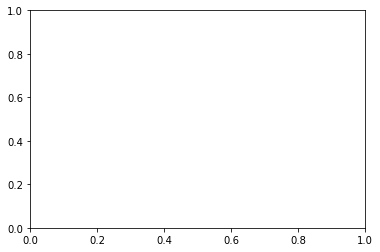

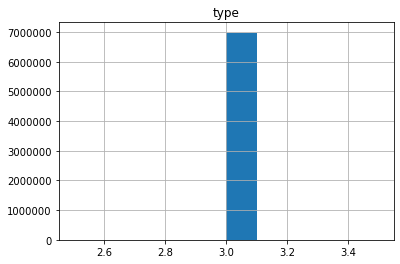

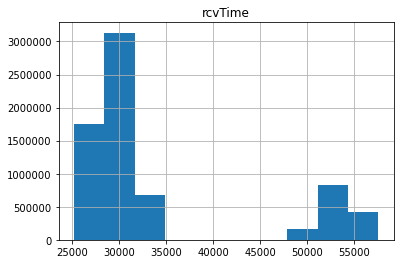

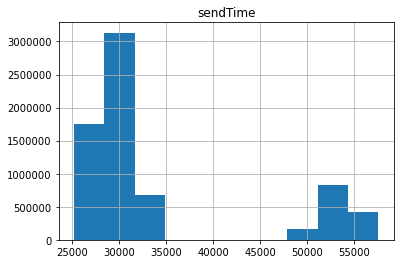

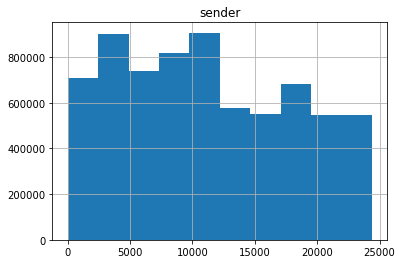

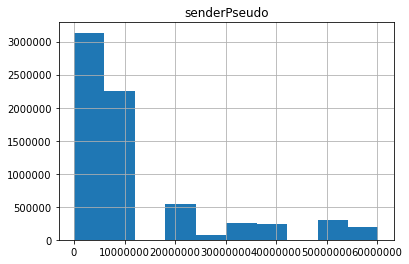

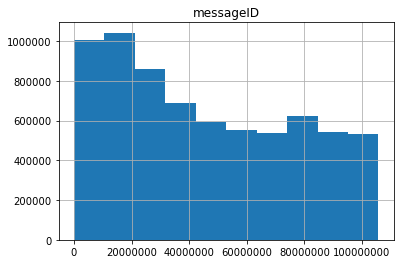

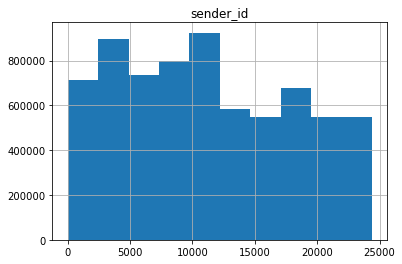

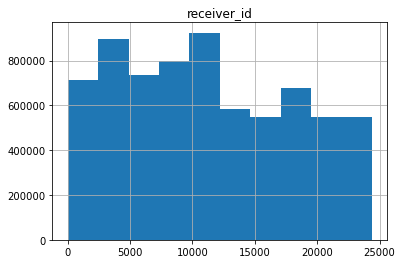

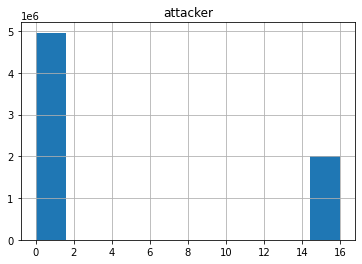

In [17]:
for c in ['type','rcvTime','sendTime','sender','senderPseudo','messageID','sender_id','receiver_id','attacker']:
        plt.ticklabel_format(style='plain')
        df.hist(c)

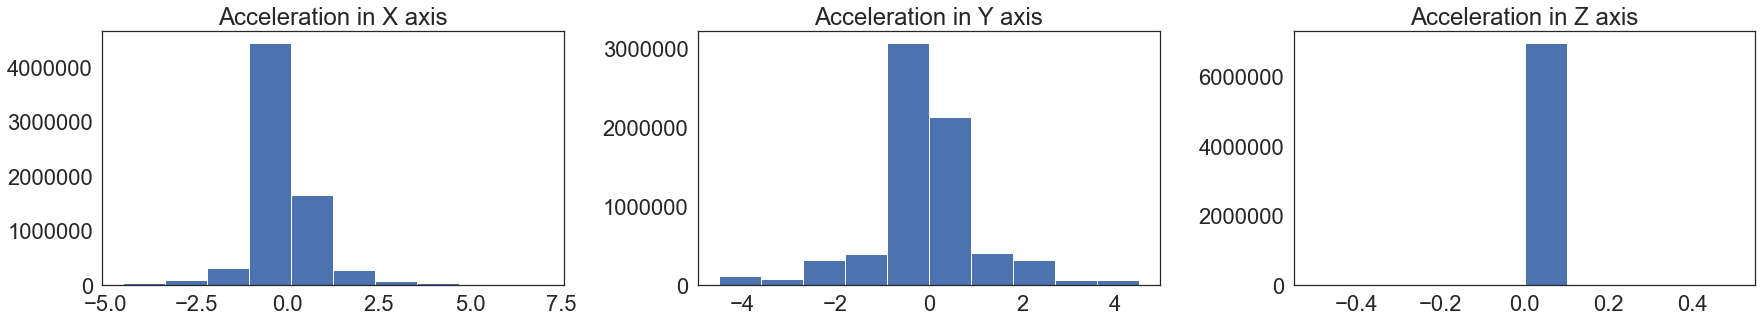

In [80]:
plt.figure(figsize=(25,5))
plt.subplot(1,3,1)
plt.hist(df['acl_x'])
plt.ticklabel_format(style='plain')
plt.title('Acceleration in X axis')
plt.subplot(1,3,2)
plt.hist(df['acl_y'])
plt.ticklabel_format(style='plain')
plt.title('Acceleration in Y axis')
plt.subplot(1,3,3)
plt.hist(df['acl_z'])
plt.ticklabel_format(style='plain')
plt.title('Acceleration in Z axis')
plt.tight_layout()

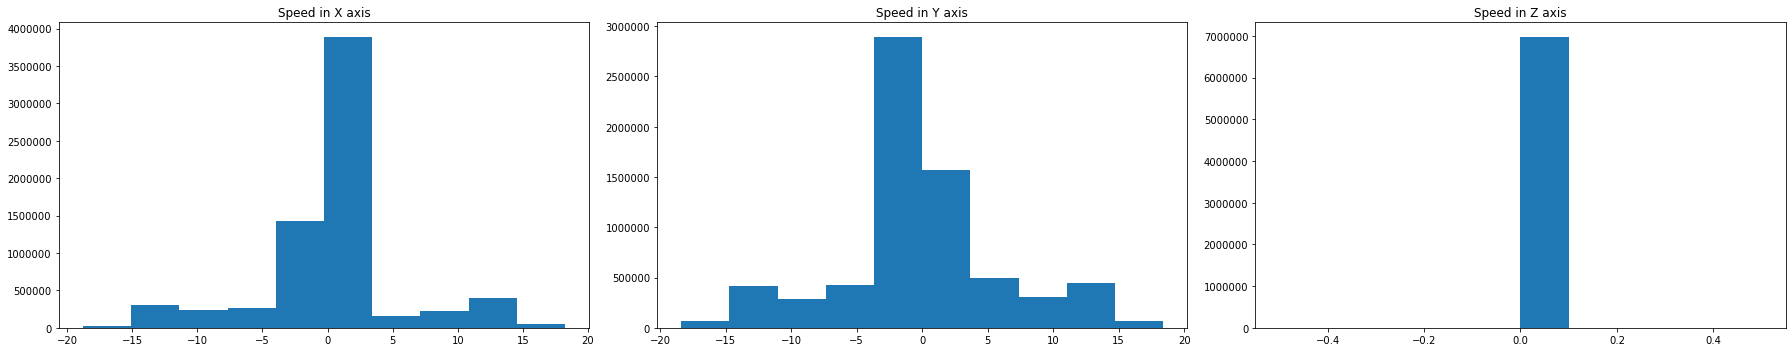

In [122]:
plt.figure(figsize=(25,5))
plt.subplot(1,3,1)
plt.hist(df['spd_x'])
plt.ticklabel_format(style='plain')
plt.title('Speed in X axis')
plt.subplot(1,3,2)
plt.hist(df['spd_y'])
plt.ticklabel_format(style='plain')
plt.title('Speed in Y axis')
plt.subplot(1,3,3)
plt.hist(df['spd_z'])
plt.ticklabel_format(style='plain')
plt.title('Speed in Z axis')
plt.tight_layout()

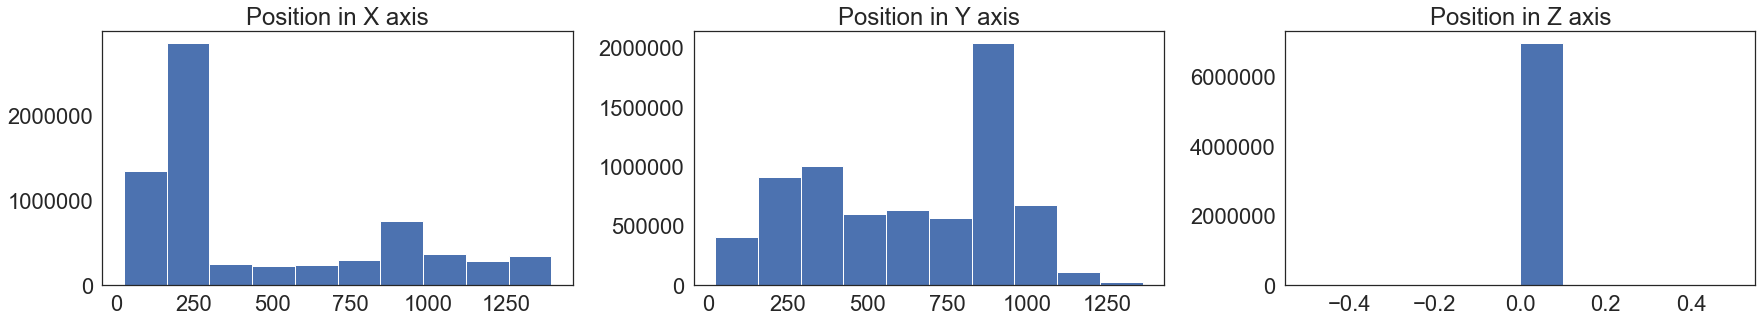

In [81]:

plt.figure(figsize=(25,5))
plt.subplot(1,3,1)
plt.hist(df['pos_x'])
plt.ticklabel_format(style='plain')
plt.title('Position in X axis')
plt.subplot(1,3,2)
plt.hist(df['pos_y'])
plt.ticklabel_format(style='plain')
plt.title('Position in Y axis')
plt.subplot(1,3,3)
plt.hist(df['pos_z'])
plt.ticklabel_format(style='plain')
plt.title('Position in Z axis')
plt.tight_layout()

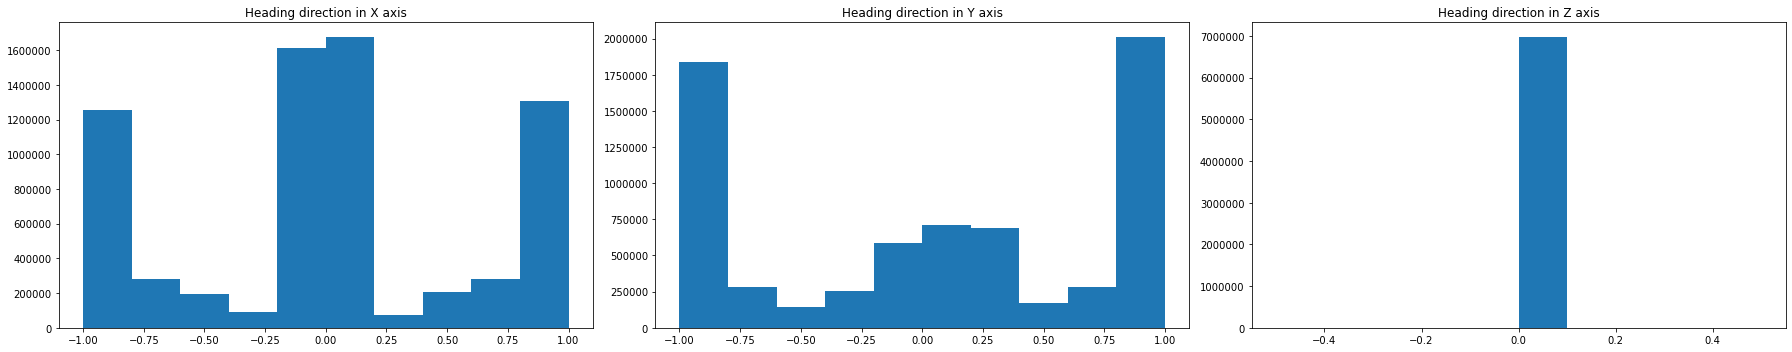

In [36]:

plt.figure(figsize=(25,5))
plt.subplot(1,3,1)
plt.hist(df['hed_x'])
plt.ticklabel_format(style='plain')
plt.title('Heading direction in X axis')
plt.subplot(1,3,2)
plt.hist(df['hed_y'])
plt.ticklabel_format(style='plain')
plt.title('Heading direction in Y axis')
plt.subplot(1,3,3)
plt.hist(df['hed_z'])
plt.ticklabel_format(style='plain')
plt.title('Heading direction in Z axis')
plt.tight_layout()

In [42]:
df['pos_x'][:10]

0    224.046753
1    220.660717
2    215.707740
3    257.185966
4    226.477745
5    224.068510
6    218.696163
7    265.910262
8    225.640595
9    219.839342
Name: pos_x, dtype: float64

D:\Anaconda fresh\envs\DAB_libs\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0, 0.5, 'Position in y-axis')

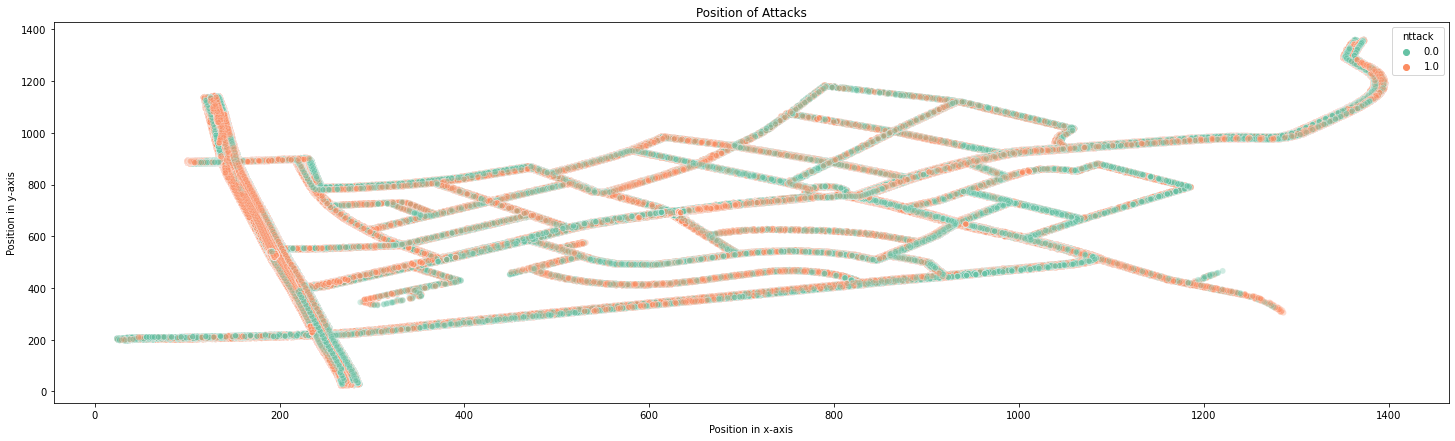

In [64]:
plt.figure(figsize=(25,7))
# plt.subplot(2,1,1)
# sns.scatterplot(df['pos_x'],df['pos_y'],hue=df['attacker'])
# plt.subplot(2,1,2)
sns.scatterplot(df['pos_x'],df['pos_y'],hue=df['nttack'],palette="Set2",alpha=0.3)
plt.title('Position of Attacks')
plt.xlabel('Position in x-axis')
plt.ylabel('Position in y-axis')

Text(0.5, 1.0, 'Attacks as per Speed')

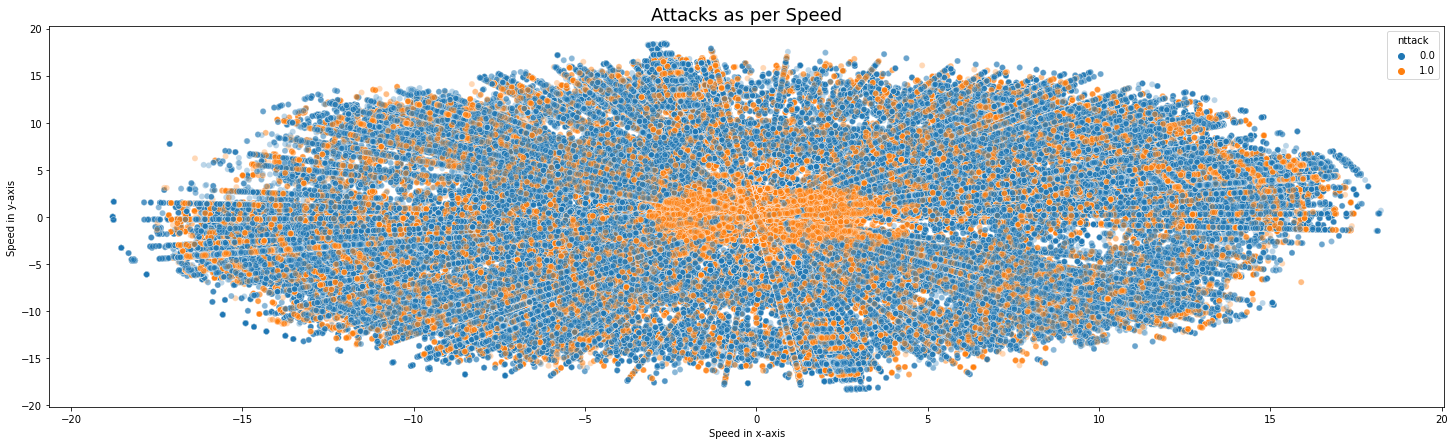

In [68]:
plt.figure(figsize=(25,7))
sns.scatterplot(x='spd_x',y='spd_y',hue='nttack',data=df,palette=('tab10'),alpha=0.3)
plt.xlabel('Speed in x-axis')
plt.ylabel('Speed in y-axis')
plt.title('Attacks as per Speed',fontsize=18)

Text(0.5, 1.0, 'Attacks as per Acceleration')

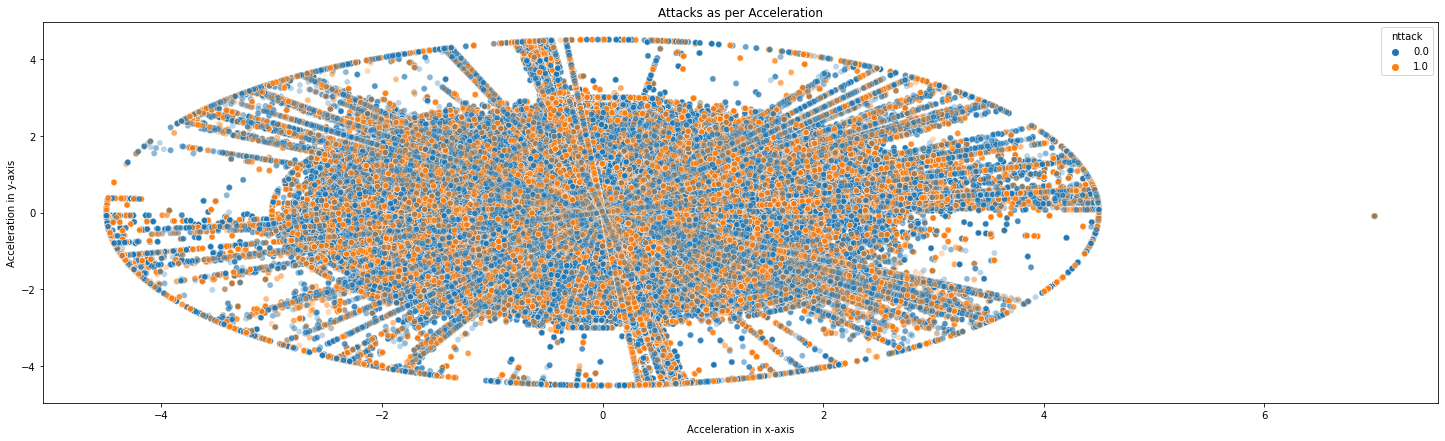

In [69]:
plt.figure(figsize=(25,7))
sns.scatterplot(x='acl_x',y='acl_y',hue='nttack',data=df,palette=('tab10'),alpha=0.3)
plt.xlabel('Acceleration in x-axis')
plt.ylabel('Acceleration in y-axis')
plt.title('Attacks as per Acceleration')

Text(0.5, 1.0, 'Attacks as per Heading direction')

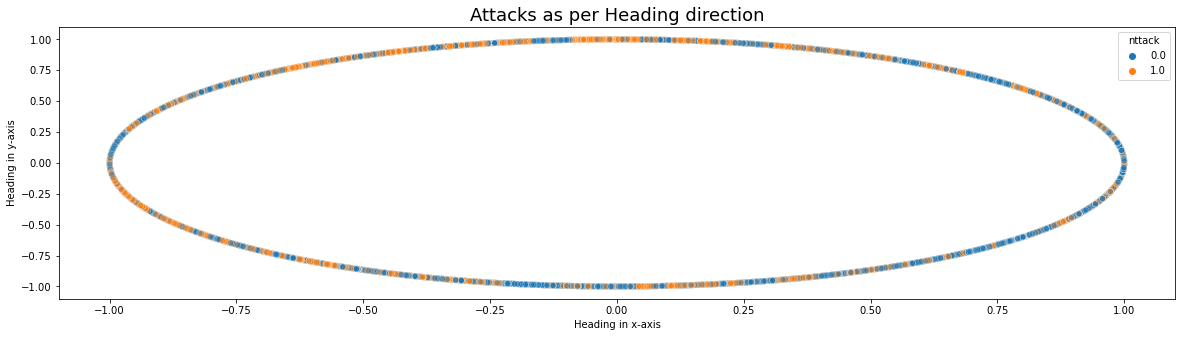

In [70]:
plt.figure(figsize=(20,5))
sns.scatterplot(x='hed_x',y='hed_y',hue='nttack',data=df,palette=('tab10'),alpha=0.3)
plt.xlabel('Heading in x-axis')
plt.ylabel('Heading in y-axis')
plt.title('Attacks as per Heading direction',fontsize=18)

In [4]:
df.head()

,type,rcvTime,sendTime,sender,senderPseudo,messageID,pos_x,pos_y,pos_z,spd_x,spd_y,spd_z,acl_x,acl_y,acl_z,hed_x,hed_y,hed_z,receiver_id,nttack
0,3,28479.050886,28479.050886,9957.0,1099572.0,37781823.0,224.046753,323.077857,0.0,-2.255934,15.005662,0.0,0.134747,-0.896043,0.0,-0.106880,0.994272,0.0,10005,0.0
1,3,28479.055834,28479.055834,9351.0,3093512.0,37782022.0,220.660717,421.005507,0.0,0.000006,0.000006,0.0,0.000006,0.000006,0.0,0.078366,-0.996925,0.0,10005,1.0
2,3,28479.074613,28479.074613,9633.0,3096332.0,37782403.0,215.707740,437.315570,0.0,0.000006,0.000006,0.0,0.000006,0.000006,0.0,0.078163,-0.996941,0.0,10005,1.0
3,3,28479.098722,28479.098722,9711.0,2097112.0,37783223.0,257.185966,144.148710,0.0,0.059791,-0.325144,0.0,0.058676,-0.324655,0.0,-0.147791,0.989019,0.0,10005,1.0
4,3,28479.117215,28479.117215,9993.0,6099932.0,37783550.0,226.477745,299.455405,0.0,0.131626,-0.891520,0.0,0.134747,-0.896043,0.0,-0.116834,0.993151,0.0,10005,1.0


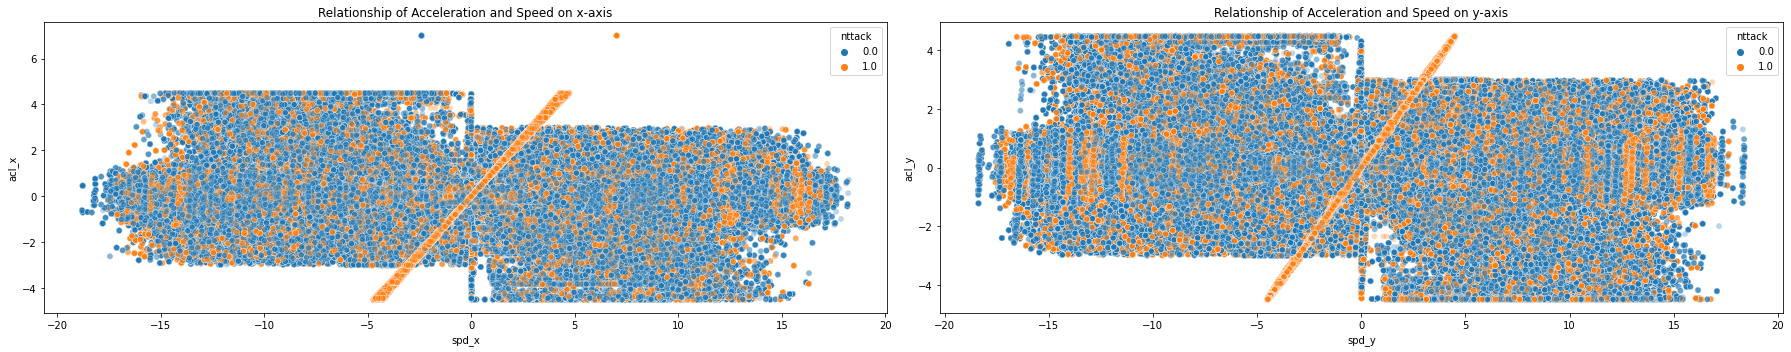

In [20]:
plt.figure(figsize=(25,5))
plt.subplot(1,2,1)
sns.scatterplot(data=df,y='acl_x',x='spd_x',hue='nttack',alpha=0.3)
plt.ticklabel_format(style='plain')
plt.title('Relationship of Acceleration and Speed on x-axis')

plt.subplot(1,2,2)
sns.scatterplot(data=df,y='acl_y',x='spd_y',hue='nttack',alpha=0.3)
plt.ticklabel_format(style='plain')
plt.title('Relationship of Acceleration and Speed on y-axis')

plt.tight_layout()

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import  train_test_split

In [23]:
x = df.drop('nttack',axis=1)
y = df['nttack']

In [25]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.7)

In [26]:
x_test,x_val,y_test,y_val = train_test_split(x_test,y_test,train_size=0.5)

In [27]:
clf = DecisionTreeClassifier()

clf = clf.fit(x_train,y_train)

<AxesSubplot:title={'center':'Decision Tree based Feature Importance'}>

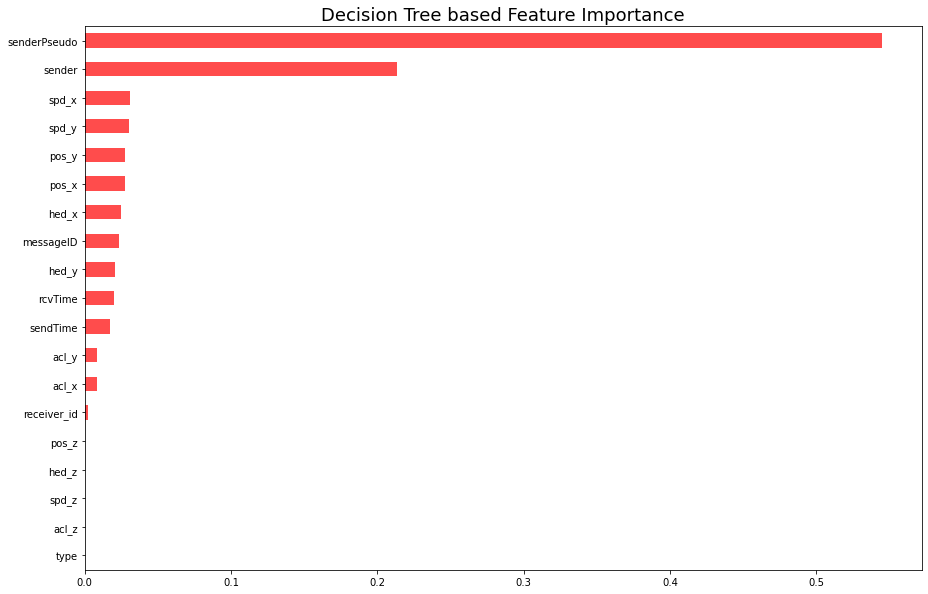

In [55]:

feat_importances = pd.Series(clf.feature_importances_, index= x.columns)
plt.figure(figsize=(15,10))
plt.title('Decision Tree based Feature Importance', fontsize=18)
feat_importances.sort_values().plot(kind='barh',color='r',alpha=0.7)


In [57]:
from rfpimp import *

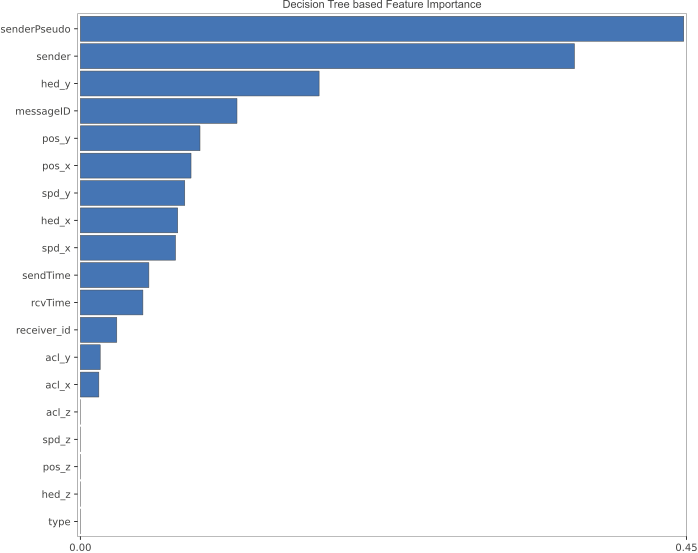

In [63]:
I = importances(clf, x_train, y_train)
fig,ax = plt.subplots(figsize=(10,8))
plot_importances(I, color='#4575b4',ax=ax,title='Decision Tree based Feature Importance',) 

In [71]:
I

,Importance
Feature,
senderPseudo,0.4438
sender,0.3634
hed_y,0.1756
messageID,0.1152
pos_y,0.0880
pos_x,0.0814
spd_y,0.0768
hed_x,0.0716
spd_x,0.0700
